In [91]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score
import xgboost as xgb
from data_processing import load_data_np, visualize20

In [82]:
train_images = '../data/in/mnist/train-images-idx3-ubyte/train-images-idx3-ubyte'
train_labels = '../data/in/mnist/train-labels-idx1-ubyte/train-labels-idx1-ubyte'
test_images = '../data/in/mnist/t10k-images-idx3-ubyte/t10k-images-idx3-ubyte'
test_labels = '../data/in/mnist/t10k-labels-idx1-ubyte/t10k-labels-idx1-ubyte'

In [83]:
X_train, X_test, y_train, y_test = load_data_np(train_images, train_labels, test_images, test_labels)

In [84]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


Softmax classification

In [85]:
from sklearn import linear_model

# define model and fit

logreg = linear_model.LogisticRegression(C=1e5, solver='lbfgs', multi_class='multinomial')
logreg.fit(X_train, y_train)

/home/linhnm/research/numerical_method/venv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=100000.0, multi_class='multinomial')

In [90]:
y_pred_prob = logreg.predict_proba(X_test)
y_pred = logreg.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'multinomial class accuracy: {acc}')

multinomial class accuracy: 0.9243


Random forest 

In [88]:
from sklearn.ensemble import RandomForestClassifier

classifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 42)
classifier.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=10, random_state=42)

In [89]:
y_pred = classifier.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'random forest accuracy: {acc}')

random forest accuracy: 0.9469


XGBoost

In [92]:
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', device='cuda')
model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device='cuda', early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, objective='multi:softprob', ...)

In [93]:
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f'xgboost accuracy: {acc}')

xgboost accuracy: 0.978


In [97]:
y_batch = y_test[10:30]
X_batch_mtrx = X_test[10:30,:]
X_batch_img = X_test[10:30,:].reshape((20, 28, 28))

In [100]:
y_pred_batch = model.predict(X_batch_mtrx)

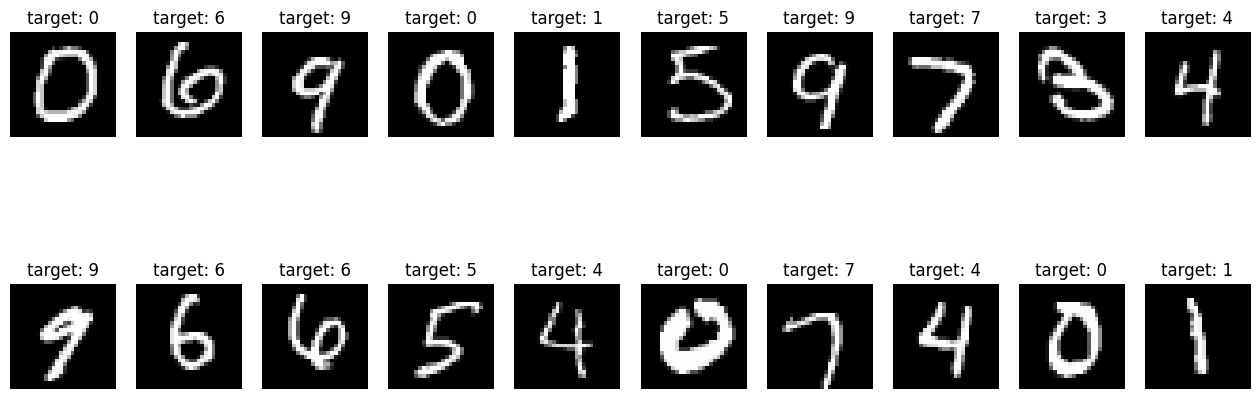

In [99]:
visualize20(X_batch_img, y_batch)

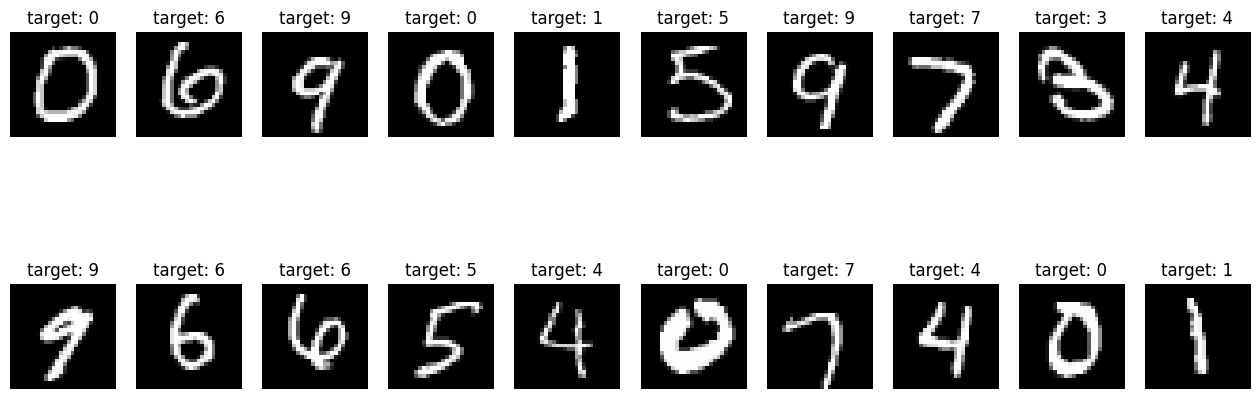

In [101]:
visualize20(X_batch_img, y_pred_batch)

In [ ]:
# dtrain_clf = xgb.DMatrix(X_train, y_train, enable_categorical=True)
# dtest_clf = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [ ]:
# import xgboost as xgb

In [ ]:
# dtrain_clf = xgb.DMatrix(X_train, y_train, enable_categorical=True)
# dtest_clf = xgb.DMatrix(X_test, y_test, enable_categorical=True)

In [ ]:
# params = {"objective": "multi:softprob", "device": "cuda", "num_class": 10}
# n = 1000

In [ ]:
# results = xgb.cv(
#   params, dtrain_clf,
#   num_boost_round=n,
#   nfold=5,
#   metrics=["mlogloss", "auc", "merror"],
# )

In [ ]:
# results.keys()

Index(['train-mlogloss-mean', 'train-mlogloss-std', 'train-auc-mean',
       'train-auc-std', 'train-merror-mean', 'train-merror-std',
       'test-mlogloss-mean', 'test-mlogloss-std', 'test-auc-mean',
       'test-auc-std', 'test-merror-mean', 'test-merror-std'],
      dtype='object')

In [ ]:
# results.predict(X_test)

AttributeError: 'DataFrame' object has no attribute 'predict'